# Brain Age 

In [3]:
path=  'C:/Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/'
#import sys
#sys.path.append(path) 
path_=  'C:/Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models'
import sys
sys.path.append(path_) 

# Regressor

In [4]:
from sklearn.linear_model import ElasticNet
from base_regressor import BaseRegressor
from Plotter import Plotter
from skopt.space import Real, Categorical, Integer

class ElasticNetRegressor(BaseRegressor):
    def __init__(self, save_path=None, scaler=None, params=None, params_space=None, fit_params_search=None, model_params_search=None, fit_params_train=None, model_params_train=None, name_model="ElasticNet"):
        super().__init__(save_path, scaler, params, params_space, fit_params_search, model_params_search, fit_params_train, model_params_train, name_model)

        self.model_ml = ElasticNet
        if params is None:
            self.params = {
                'alpha': 0.2,
                'l1_ratio': 0.5,  # Proporción de L1 en la regularización
                'max_iter': 10000,
                # 'tol': 0.001
            }
        if params_space is None:
            self.params_space = {
                'alpha': Real(0.001, 10.0, prior='log-uniform'),
                'l1_ratio': Real(0.0, 1.0),  # Rango de 0 a 1 para la proporción de L1
                'max_iter': Integer(100, 10000),
                'tol': Real(1e-5, 1e-2, prior='log-uniform')
            }


c:\python_env\brain_age_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
model = ElasticNetRegressor()
Plotters = Plotter()

In [6]:
# Parametros de Plot
colorset = 'Olive'
nameset = 'ElasticNet'

#parametros de scaler
#1:sin scaler 2:Zscore 3:MinMax
Scaler=2


# Data

In [7]:
# 72 Features
features = ['Alpha2_canon_EPP_HPC_left', 'Alpha2_canon_EPP_HPC_right', 'Alpha2_canon_EPP_PARIET_left', 'Alpha2_canon_EPP_PARIET_right', 'Alpha2_canon_EPP_OCC_left', 'Alpha2_canon_EPP_OCC_right', 'Alpha2_canon_RPD_HPC_left', 'Alpha2_canon_RPD_HPC_right', 'Alpha2_canon_RPD_CING_left', 'Alpha2_canon_RPD_CING_right', 'Alpha2_canon_RPD_PARIET_left', 'Alpha2_canon_RPD_PARIET_right', 'Alpha2_canon_RPD_OCC_left', 'Alpha2_canon_RPD_OCC_right', 'High_subj_spec_EPP_HPC_left', 'High_subj_spec_EPP_HPC_right', 'High_subj_spec_EPP_CING_left', 'High_subj_spec_EPP_CING_right', 'High_subj_spec_EPP_PARIET_left', 'High_subj_spec_EPP_PARIET_right', 'High_subj_spec_EPP_OCC_left', 'High_subj_spec_EPP_OCC_right', 'High_subj_spec_RPD_HPC_left', 'High_subj_spec_RPD_HPC_right', 'High_subj_spec_RPD_CING_left', 'High_subj_spec_RPD_CING_right', 'High_subj_spec_RPD_PARIET_left', 'High_subj_spec_RPD_PARIET_right', 'High_subj_spec_RPD_OCC_left', 'High_subj_spec_RPD_OCC_right', 'Low_subj_spec_EPP_HPC_left', 'Low_subj_spec_EPP_HPC_right', 'Low_subj_spec_EPP_CING_left', 'Low_subj_spec_EPP_CING_right', 'Low_subj_spec_EPP_PARIET_left', 'Low_subj_spec_EPP_PARIET_right', 'Low_subj_spec_EPP_OCC_left', 'Low_subj_spec_EPP_OCC_right', 'Low_subj_spec_RPD_HPC_left', 'Low_subj_spec_RPD_HPC_right', 'Low_subj_spec_RPD_CING_left', 'Low_subj_spec_RPD_CING_right', 'Low_subj_spec_RPD_PARIET_left', 'Low_subj_spec_RPD_PARIET_right', 'Low_subj_spec_RPD_OCC_left', 'Low_subj_spec_RPD_OCC_right', 'TF_ORB_left', 'TF_ORB_right', 'TF_IFG_left', 'TF_IFG_right', 'TF_MFG_left', 'TF_MFG_right', 'TF_SFG_left', 'TF_SFG_right', 'TF_HPC_left', 'TF_HPC_right', 'TF_INS_left', 'TF_INS_right', 'IAF_ORB_left', 'IAF_ORB_right', 'IAF_IFG_left', 'IAF_IFG_right', 'IAF_MFG_left', 'IAF_MFG_right', 'IAF_SFG_left', 'IAF_SFG_right', 'IAF_HPC_left', 'IAF_HPC_right', 'IAF_INS_left', 'IAF_INS_right', 'IAF_OCC_left', 'IAF_OCC_right']

In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import pickle

path_metric = f'{path}Multiple_Brain_Age_Clocks/pre_data/'


file_path_CN = f'{path_metric}CN_combined.xlsx'
file_path_AD = f'{path_metric}AD_combined.xlsx'
file_path_FTD = f'{path_metric}FTD_combined.xlsx'
file_path_MCI = f'{path_metric}MCI_combined.xlsx'

df_CN = pd.read_excel(file_path_CN)
df_AD = pd.read_excel(file_path_AD)
df_FTD = pd.read_excel(file_path_FTD)
df_MCI = pd.read_excel(file_path_MCI)

df_CN_filtrado = df_CN[(df_CN['Age'] >=20) & (df_CN['Age'] <= 90)].reset_index(drop=True)


In [22]:
X_CN = df_CN_filtrado[features]
y_CN = df_CN_filtrado["Age"]
ID_CN = df_CN_filtrado["ID-unique"]

#Scaler segun algoritmo
scaler = StandardScaler()
scaler.fit(X_CN)

X_CN_scaled = scaler.transform(X_CN)

X_CN_scaled = pd.DataFrame(X_CN_scaled, columns=X_CN.columns)

df_concatenado_CN = pd.concat([X_CN, y_CN, ID_CN], axis=1, ignore_index=False)

In [ ]:
#'neg_mean_absolute_error'
#'neg_mean_squared_error'
#'neg_root_mean_squared_error'
#'explained_variance'
#'r2'

opt_model, best_params = model.search_best_model (X=X_CN_scaled, y=y_CN, n_iter_=50, scoring_metric='neg_mean_absolute_error')


In [27]:
with open(f'results_model/opt_model_regression_brain_age_20_90_years_CN.pickle', 'wb') as file:
        pickle.dump(opt_model, file)

In [ ]:
with open(f'results_model/opt_model_regression_brain_age_20_90_years_CN.pickle', 'rb') as file:
    opt_model= pickle.load(file)

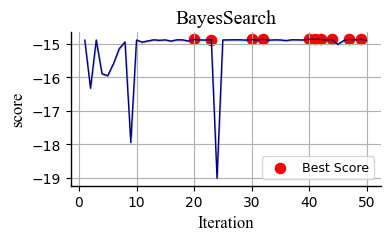

Top 1: Iteration 41, Score -14.857046978359545
Top 2: Iteration 32, Score -14.857098203989077
Top 3: Iteration 42, Score -14.85871086146444
Top 4: Iteration 40, Score -14.858890415045483
Top 5: Iteration 49, Score -14.859460189572655
Top 6: Iteration 47, Score -14.85955673306176
Top 7: Iteration 20, Score -14.863414652461724
Top 8: Iteration 30, Score -14.864647478709113
Top 9: Iteration 44, Score -14.865166716354304
Top 10: Iteration 23, Score -14.866628260697244


In [28]:
score = opt_model.cv_results_['mean_test_score'][:50]
Plotters.plot_iteration(y=score, title='BayesSearch', xlabel='Iteration', ylabel='score', legend_result=False, best_result=True, y_size=2, font='Times New Roman', weight='normal', mode=2, band_width=0.015)

In [29]:
best_params

{'alpha': 0.03517639240571356, 'l1_ratio': 1.0, 'max_iter': 5584, 'tol': 0.01}

# Training

In [30]:
results_labels_df_CN_train, results_labels_df_CN_test,  results_model, results_per_fold_CN_train, results_per_fold_CN_test, df_CN_avg_train,df_CN_avg_test= model.trainer(
        X=X_CN,
        y=y_CN,
        ID_label='ID-unique',
        ID=ID_CN,
        n_splits=10,
        n_iterations=20,
        params_=best_params
    )

c:\Users\felip\OneDrive - Universidad Técnica Federico Santa María\Documentos\Brain\Brain_Age_Clock\base_regressor.py:207: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_train = pd.concat([results_labels_df_train, temp_df_train], ignore_index=True)
c:\Users\felip\OneDrive - Universidad Técnica Federico Santa María\Documentos\Brain\Brain_Age_Clock\base_regressor.py:209: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_test = pd.concat([results_labels_df_test, temp_

In [31]:
import pickle

results_training = [results_labels_df_CN_train, results_labels_df_CN_test, results_model, 
           results_per_fold_CN_train, results_per_fold_CN_test, df_CN_avg_train, df_CN_avg_test]

with open('results_model/resultados_modelo_brain_age_20_90_years_CN.pkl', 'wb') as f:
    pickle.dump(results_training, f)

In [ ]:
with open('results_model/resultados_modelo_brain_age_20_90_years_CN.pkl', 'rb') as f:
    loaded_results = pickle.load(f)

results_labels_df_CN_train, results_labels_df_CN_test, results_model, results_per_fold_CN_train, results_per_fold_CN_test, df_CN_avg_train, df_CN_avg_test = loaded_results

                            OLS Regression Results                            
Dep. Variable:                 y_pred   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     486.0
Date:                Mon, 16 Dec 2024   Prob (F-statistic):           5.16e-92
Time:                        17:15:29   Log-Likelihood:                -4930.7
No. Observations:                1328   AIC:                             9865.
Df Residuals:                    1326   BIC:                             9876.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.6945      0.687     49.045      0.0

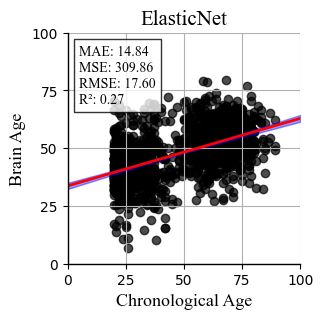

Error medio absoluto: 14.843804244626973
Error cuadrático medio: 309.8624827823375
Raíz del error cuadrático medio: 17.602911201910253
Coeficiente de determinación (R²): 0.26608333987049504


In [32]:
Plotters.plot_regresion(y=df_CN_avg_test['y_pred'],x= df_CN_avg_test['y_labels'], label_='Test Data',x_ticks_step=25,y_ticks_step=25,x_min_limit=0,y_min_limit=0,x_max_limit=100,y_max_limit=100,color='Black', title=nameset,line_ideal=False,confidence_interval=True,  alpha=0.7,xlabel='Chronological Age',ylabel='Brain Age',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red', details=True, font='Times New Roman', weight='normal', x_size=3,y_size=3, legend=False, fontsize=13, mode=2)

                            OLS Regression Results                            
Dep. Variable:       y_pred_corrected   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     5404.
Date:                Mon, 16 Dec 2024   Prob (F-statistic):               0.00
Time:                        17:15:38   Log-Likelihood:                -4931.9
No. Observations:                1328   AIC:                             9868.
Df Residuals:                    1326   BIC:                             9878.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1915      0.688      1.733      0.0

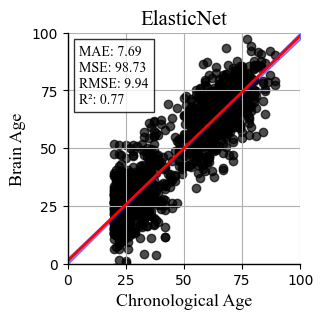

Error medio absoluto: 7.688797741872945
Error cuadrático medio: 98.72891261691754
Raíz del error cuadrático medio: 9.936242379134958
Coeficiente de determinación (R²): 0.7661582223333425


In [33]:
Plotters.plot_regresion(y=df_CN_avg_test['y_pred_corrected'],x= df_CN_avg_test['y_labels'], label_='Test Data',x_ticks_step=25,y_ticks_step=25,x_min_limit=0,y_min_limit=0,x_max_limit=100,y_max_limit=100,color='Black', title=nameset,line_ideal=False,confidence_interval=True,  alpha=0.7,xlabel='Chronological Age',ylabel='Brain Age',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red', details=True, font='Times New Roman', weight='normal', x_size=3,y_size=3, legend=False, fontsize=13, mode=2)

# SHAP

In [38]:
shap_values_CN, shap_summary_sorted_CN = model.calculate_multiple_shap(
    df_concatenado_CN, df_concatenado_CN,ID_label='ID-unique', results_per_fold_train=results_per_fold_CN_train, results_per_fold_test=results_per_fold_CN_test, models_list=results_model['model'], feature_col_range= slice(None, -2)
)

Importancia de características basada en suma de valores SHAP:
Low_subj_spec_RPD_OCC_left: 10271.931109736692
Low_subj_spec_RPD_CING_right: 5401.8196090780175
Low_subj_spec_EPP_CING_left: 5038.37396674867
High_subj_spec_EPP_OCC_left: 4677.134666482664
Low_subj_spec_RPD_CING_left: 4391.533249698184
Alpha2_canon_EPP_HPC_left: 3902.5017709271337
Low_subj_spec_EPP_HPC_left: 3702.753914853556
Low_subj_spec_EPP_PARIET_left: 3645.298982150373
High_subj_spec_RPD_CING_left: 3630.443957750012
IAF_OCC_right: 3342.6902926760367
Low_subj_spec_RPD_PARIET_left: 3059.232351706376
Low_subj_spec_EPP_HPC_right: 2999.698993230591
High_subj_spec_RPD_OCC_left: 2960.9484850823374
TF_MFG_right: 2740.9454969643925
Low_subj_spec_EPP_OCC_left: 2670.552046110139
IAF_INS_right: 2519.0798388489643
Alpha2_canon_RPD_OCC_left: 2382.8639913635225
High_subj_spec_EPP_CING_left: 2261.1437035036743
High_subj_spec_RPD_HPC_right: 2123.1150765429643
IAF_IFG_right: 2078.117121617615
Low_subj_spec_RPD_PARIET_right: 1862.1980464

In [39]:
with open('results_model/shap_summary_sorted_brain_age_20_90_years_CN.pkl', 'wb') as f:
    pickle.dump(shap_summary_sorted_CN, f)

with open('results_model/shap_values_brain_age_20_90_years_CN.pkl', 'wb') as f:
    pickle.dump(shap_values_CN, f)


In [ ]:
import pickle

# Leer los archivos y cargar los datos en las mismas variables
with open('results_model/shap_summary_sorted_brain_age_20_90_years_CN.pkl', 'rb') as f:
    shap_summary_sorted_CN = pickle.load(f)

with open('results_model/shap_values_brain_age_20_90_years_CN.pkl', 'rb') as f:
    shap_values_CN = pickle.load(f)


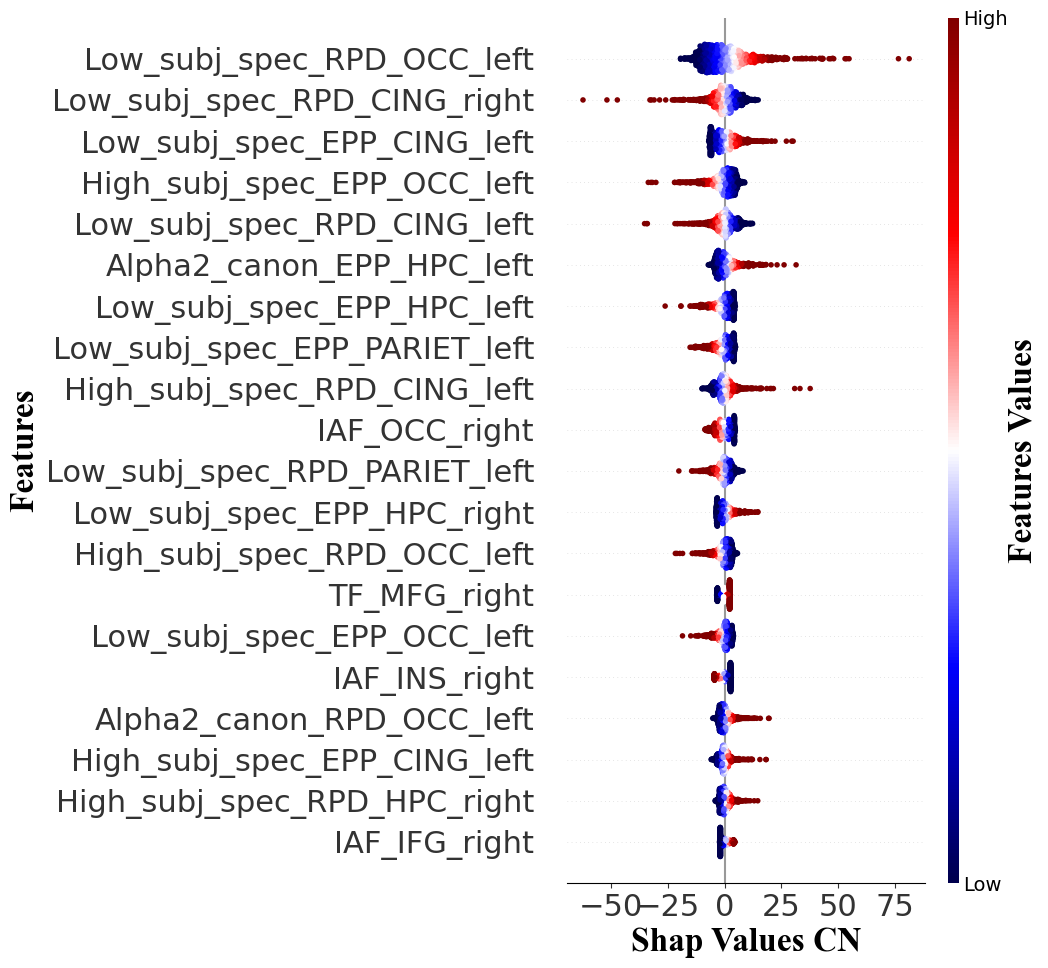

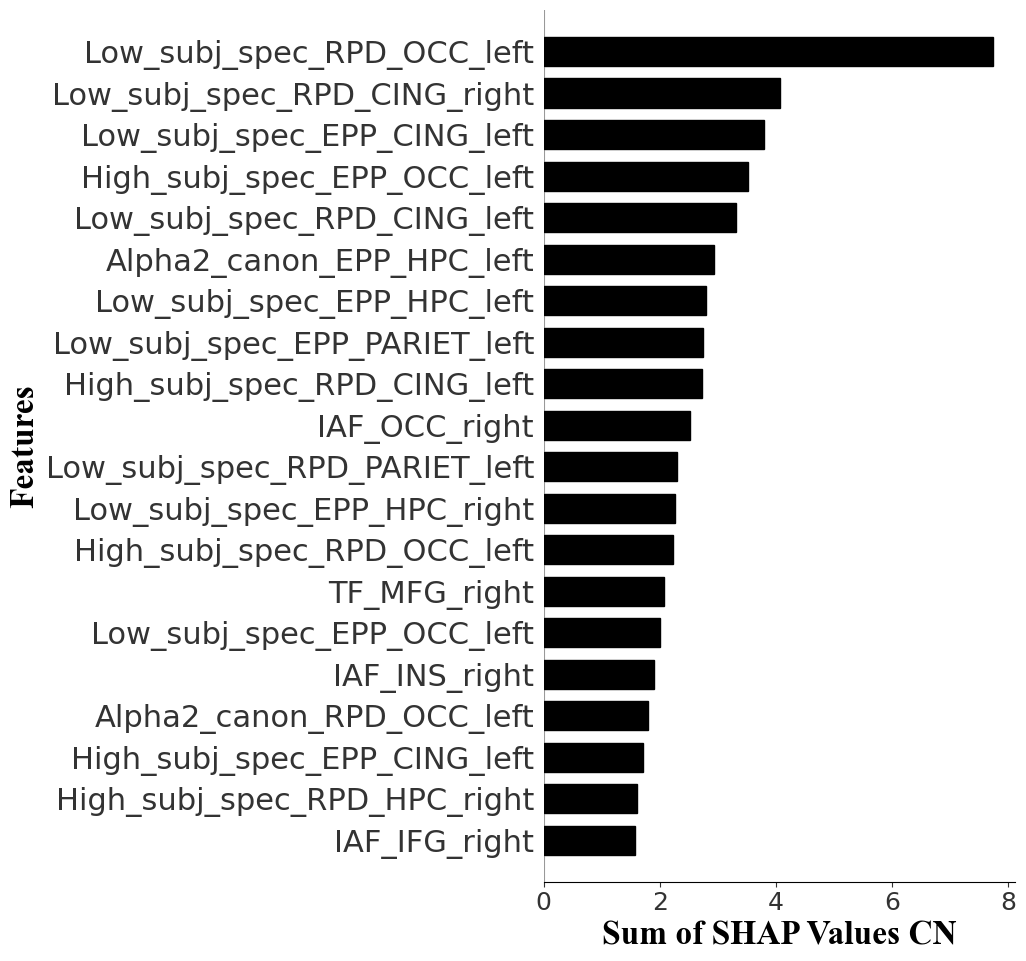

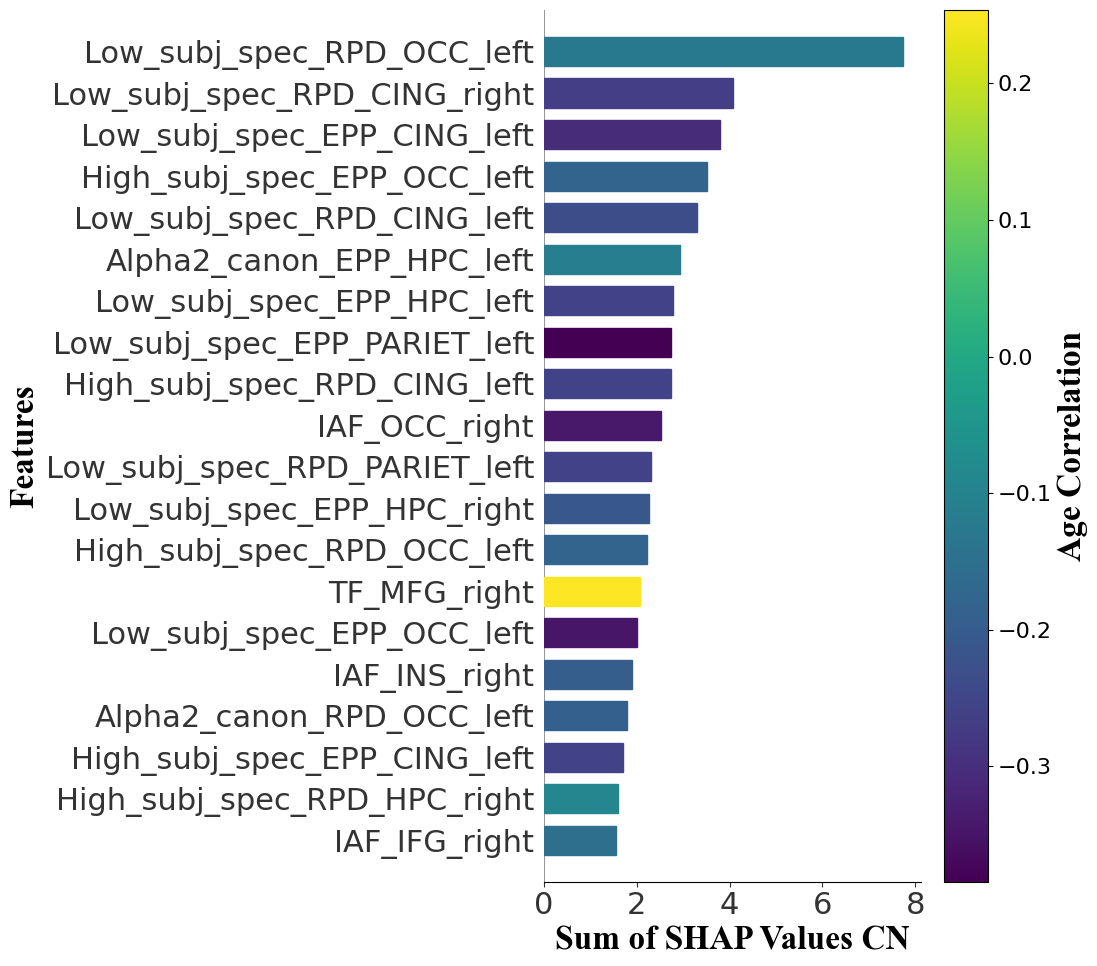

In [40]:
Plotters.plot_feature_importance(shap_values=shap_values_CN,X_test=X_CN,y_test=y_CN, font= "Times New Roman", fontsize=24, xlabel1='Shap Values CN', xlabel2='Sum of SHAP Values CN',ylabel='Features', ylabel1='Features Values', ylabel2='Age Correlation')

In [41]:
shap_per_region_sorted_CN, normalized_result_sorted_CN=model.shap_region(shap_summary_sorted=shap_summary_sorted_CN, num_max=20)

OCC_left: 1.000000
CING_left: 0.667213
HPC_left: 0.331190
PARIET_left: 0.291966
CING_right: 0.235236
HPC_right: 0.223086
OCC_right: 0.145566
MFG_right: 0.119361
INS_right: 0.109700
IFG_right: 0.090497


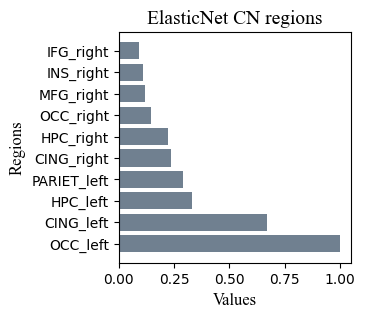

In [42]:
Plotters.plot_normalized_values(normalized_result_sorted_CN, color='slategray', name_set=f'{nameset} CN regions',x_size=3,y_size=3,font='Times New Roman', fontsize=12, xlabel='Values', ylabel='Regions')

c:\python_env\brain_age_env\Lib\site-packages\nilearn\plotting\displays\_slicers.py:308: UserWarning: empty mask
  ims = self._map_show(img, type="imshow", threshold=threshold, **kwargs)


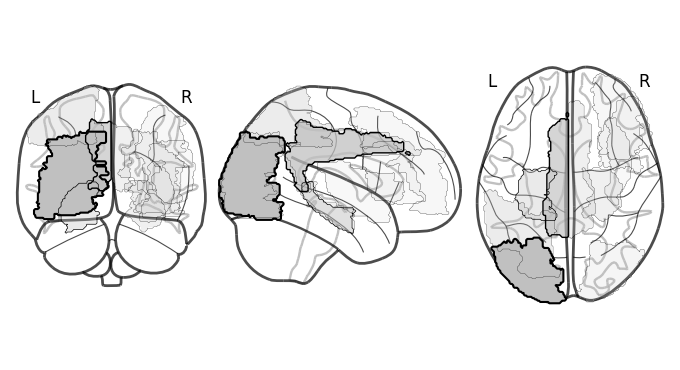

In [43]:
base_path = f'{path}cerebritos/'

Plotters.plot_brain_regions(normalized_result_sorted_CN, base_path, color='#C0C0C0')